## **Life Expectancy (WHO)**

*Statistical analysis on factors influencing life expectancy*

In [1]:
## packages
library(tidyverse)
library(magrittr)

# set some options
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100, repr.plot.width = 8, repr.plot.height = 7)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




In [2]:
## read the dataset
le = read_csv("Life Expectancy Data.csv")
head(le)

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character(),
  Status = col_character()
)

See spec(...) for full column specifications.



Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


#### Descriptives

In [3]:
## countries by status
le %>%
    dplyr::group_by(Status) %>%
    dplyr::summarise(Count = n_distinct(Country))

Status,Count
<chr>,<int>
Developed,32
Developing,161


Warning message:
"Removed 19 rows containing missing values (geom_point)."


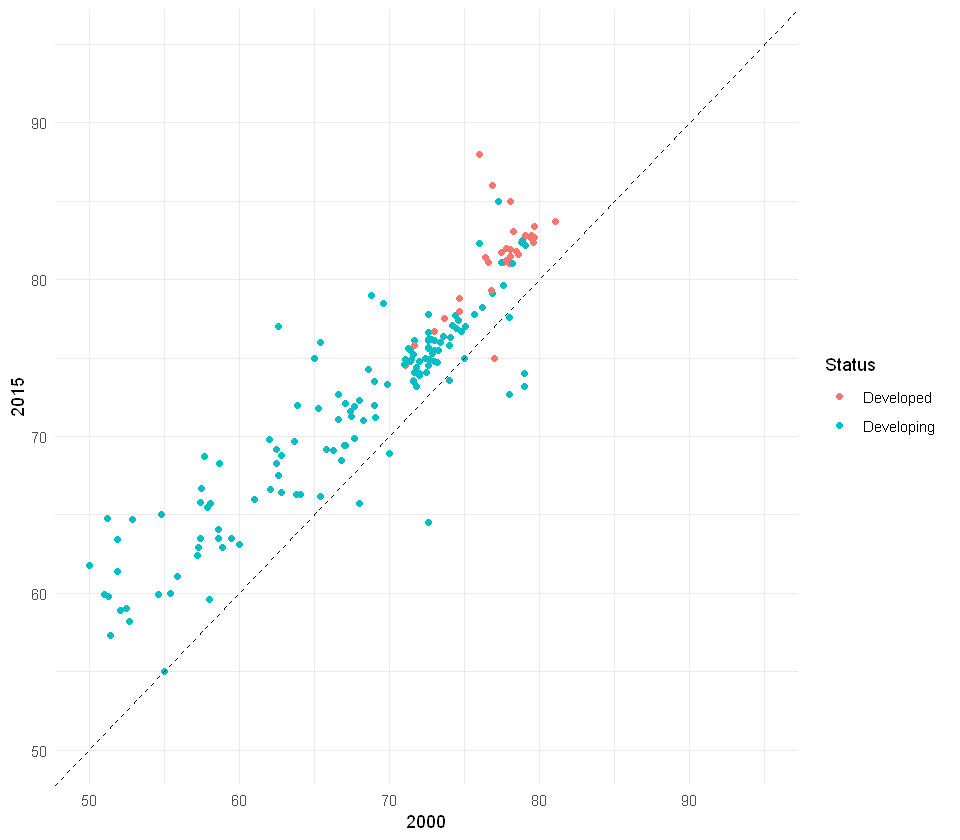

In [4]:
## life expectancy on 2000 versus 2015
le %>%
    filter(Year %in% c(2000, 2015)) %>%
    select(Country, Year, Status, `Life expectancy`) %>%
    pivot_wider(names_from=Year, values_from=`Life expectancy`) %>%
    ggplot(aes(x=`2000`, y=`2015`, color=Status)) +
    geom_point() +
    geom_abline(slope=1, intercept=0, linetype = "dashed") +
    xlim(c(50, 95)) +
    ylim(c(50, 95)) +
    theme_minimal()

Most developed the developed countries already had a high life expectancy compared to the Developing countries in the year 2000. The table below show the average life expectancy for each group in 2000 and 2015.

In [5]:
## average life expectancy
le %>%
    filter(Year %in% c(2000, 2015)) %>%
    dplyr::group_by(Year, Status) %>%
    dplyr::summarise(average_le = mean(`Life expectancy`)) %>%
    pivot_wider(names_from=Year, values_from=average_le)

Status,2000,2015
<chr>,<dbl>,<dbl>
Developed,76.80312,80.70937
Developing,64.61987,69.69007


The following graph shows the number of years increased in life expectancy from 2000 to 2015, from the country with the most increase to the country with the least increase.

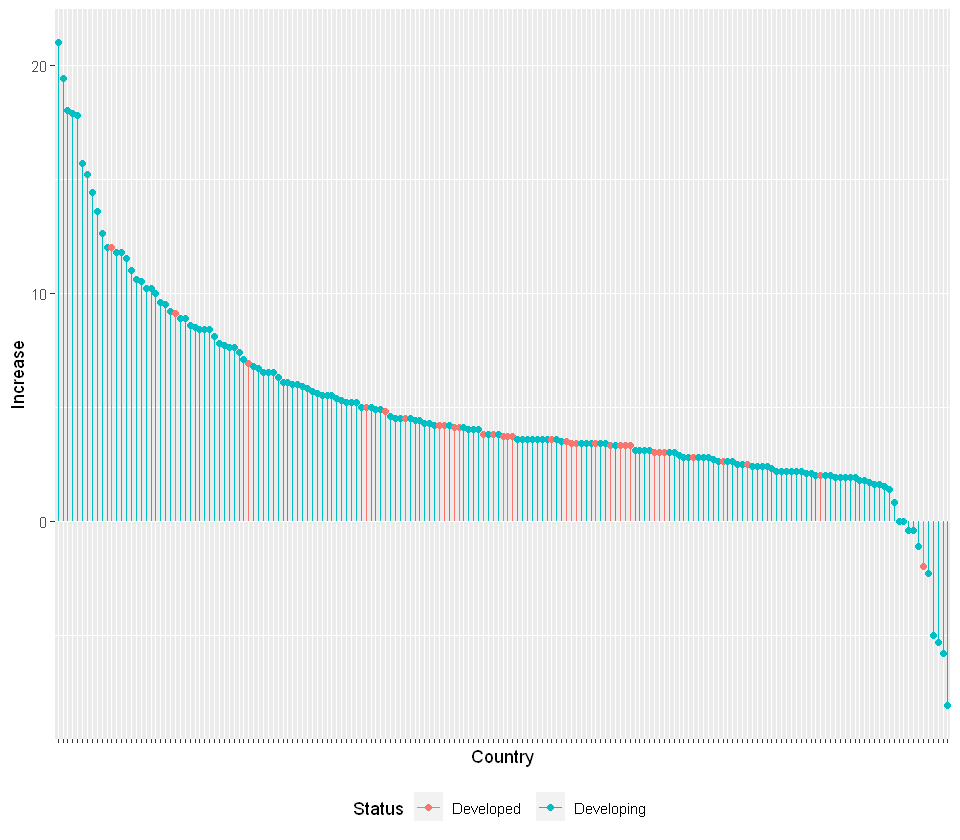

In [6]:
le %>%
    filter(Year %in% c(2000, 2015)) %>%
    select(Country, Year, Status, `Life expectancy`) %>%
    pivot_wider(names_from=Year, values_from=`Life expectancy`) %>%
    mutate(Increase = `2015`-`2000`)  %>%
    arrange(desc(Increase)) %>%
    mutate(Country = factor(Country, levels=Country)) %>%
    ggplot(aes(color=Status)) +
    geom_point(aes(x=Country, y=Increase)) +
    geom_segment(aes(x=Country, xend=Country, y=0, yend=Increase)) +
    theme(axis.text.x=element_blank(), legend.position="bottom")

In [7]:
## 5 biggest increases in life expectancy
le %>%
    filter(Year %in% c(2000, 2015)) %>%
    select(Country, Year, Status, `Life expectancy`) %>%
    pivot_wider(names_from=Year, values_from=`Life expectancy`) %>%
    mutate(Increase = `2015`-`2000`)  %>%
    arrange(desc(Increase)) %>%
    head(5)

Country,Status,2015,2000,Increase
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Zimbabwe,Developing,67.0,46.0,21.0
Eritrea,Developing,64.7,45.3,19.4
Zambia,Developing,61.8,43.8,18.0
Botswana,Developing,65.7,47.8,17.9
Rwanda,Developing,66.1,48.3,17.8


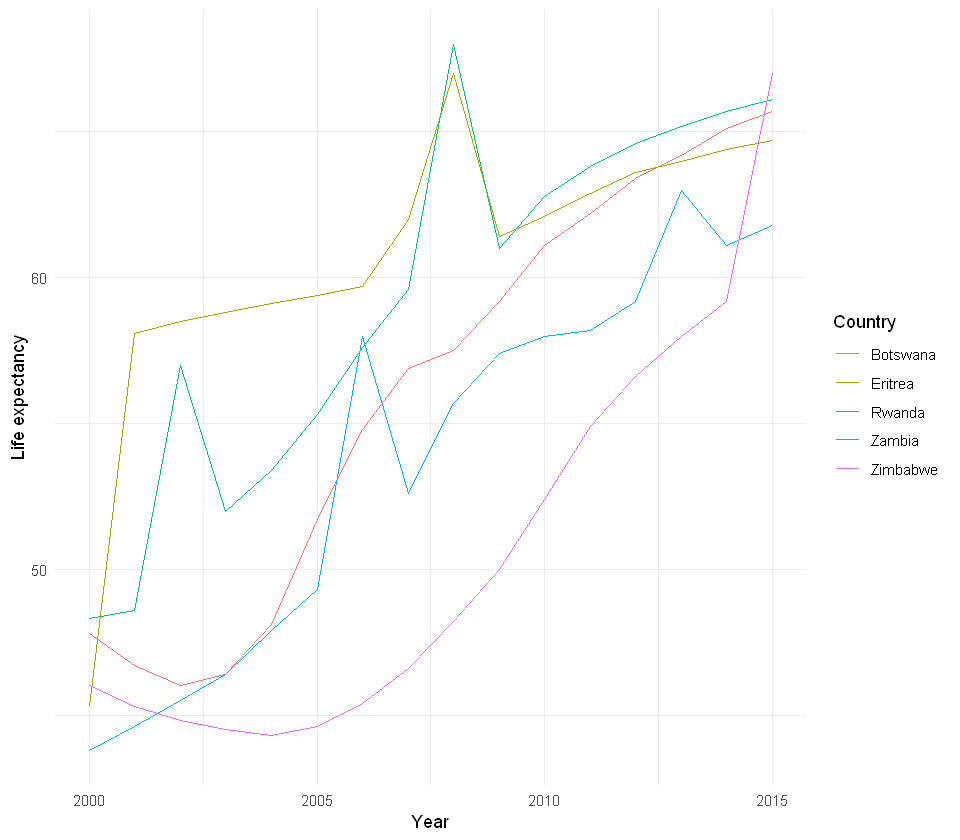

In [8]:
le %>%
    filter(Country %in% c("Zimbabwe", "Eritrea", "Zambia", "Botswana", "Rwanda")) %>%
    ggplot(aes(x=Year, y=`Life expectancy`, color=Country)) +
    geom_line() +
    theme_minimal()

The Country with the biggest increase in life expectancy was Zimbabwe, with a 21 years growth in life expectancy. As we can see in the graph above, the increase in life expectancy is not linear and have some peaks along the way.

In [9]:
## countries with decrease in life expectancy
le %>%
    filter(Year %in% c(2000, 2015)) %>%
    select(Country, Year, Status, `Life expectancy`) %>%
    pivot_wider(names_from=Year, values_from=`Life expectancy`) %>%
    mutate(Increase = `2015`-`2000`)  %>%
    filter(Increase<0)

Country,Status,2015,2000,Increase
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Estonia,Developing,77.6,78.0,-0.4
Grenada,Developing,73.6,74.0,-0.4
Iraq,Developing,68.9,70.0,-1.1
Libya,Developing,72.7,78.0,-5.3
Paraguay,Developing,74.0,79.0,-5.0
Romania,Developed,75.0,77.0,-2.0
Saint Vincent and the Grenadines,Developing,73.2,79.0,-5.8
Syrian Arab Republic,Developing,64.5,72.6,-8.1
Yemen,Developing,65.7,68.0,-2.3


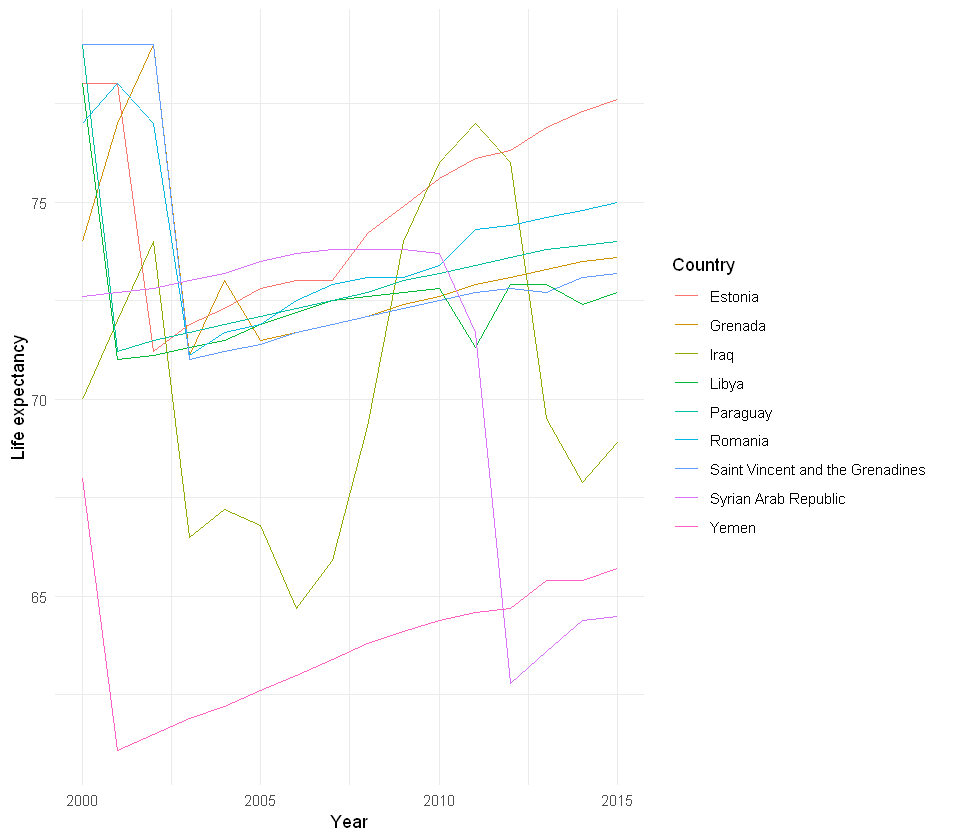

In [10]:
le %>%
    filter(Country %in% c("Estonia", "Grenada", "Iraq", "Libya", "Paraguay",
                          "Romania", "Saint Vincent and the Grenadines",
                          "Syrian Arab Republic", "Yemen")) %>%
    ggplot(aes(x=Year, y=`Life expectancy`, color=Country)) +
    geom_line() +
    theme_minimal()

In the graph above we can see the nine countries that had decreased the life expectancy. We can abserve that all countries had an abrubt decrease in life expectancy, most of them between 2000 and 2010, the exception being Syrian Arab Republic and Iraq, that had abrupt decreases between 2010 and 2015.

In [11]:
## highest life expectancy in 2000
le %>%
    filter(Year==2000) %>%
    arrange(desc(`Life expectancy`)) %>%
    select(Country, Status, `Life expectancy`) %>%
    head(5)

Country,Status,Life expectancy
<chr>,<chr>,<dbl>
Japan,Developed,81.1
Iceland,Developed,79.7
Switzerland,Developed,79.7
Sweden,Developed,79.6
Australia,Developed,79.5


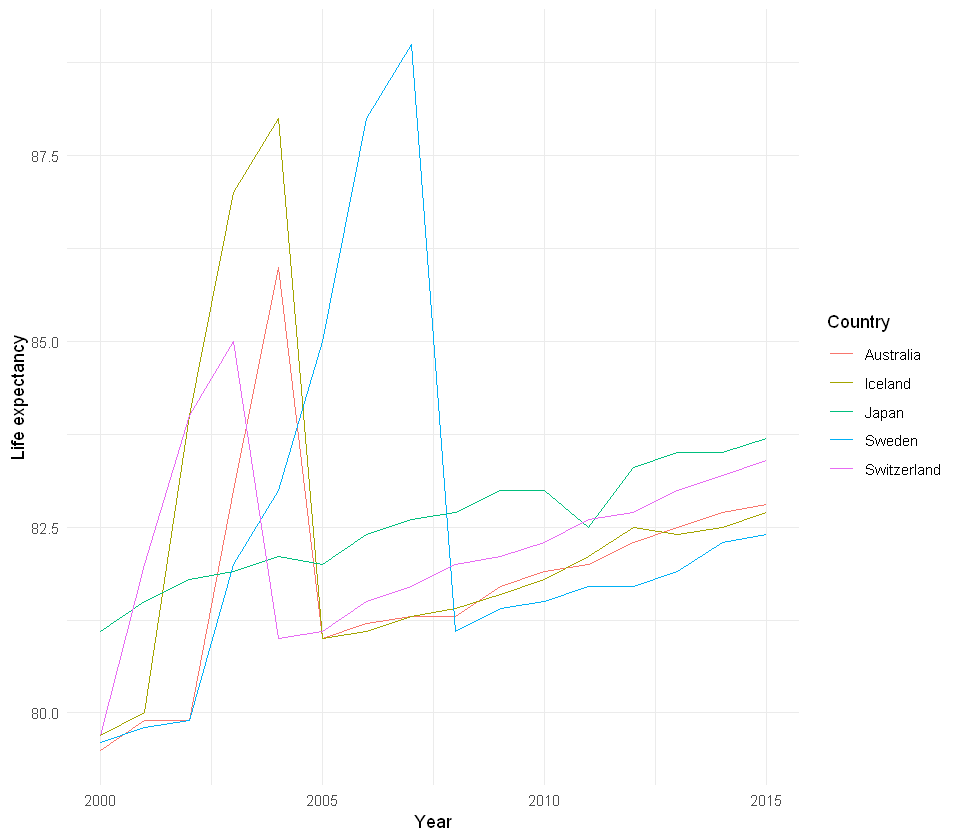

In [12]:
le %>%
    filter(Country %in% c("Japan", "Iceland", "Switzerland", "Sweden", "Australia")) %>%
    ggplot(aes(x=Year, y=`Life expectancy`, color=Country)) +
    geom_line() +
    theme_minimal()

Between the countries with highest life expectancy in the year 2000, they all presented growth in the period, having some peaks along the way. Only Japan presented an consistent growth without any peaks.

In [13]:
## highest life expectancy in 2015
le %>%
    filter(Year==2015) %>%
    arrange(desc(`Life expectancy`)) %>%
    select(Country, Status, `Life expectancy`) %>%
    head(5)

Country,Status,Life expectancy
<chr>,<chr>,<dbl>
Slovenia,Developed,88.0
Denmark,Developed,86.0
Chile,Developing,85.0
Cyprus,Developed,85.0
Japan,Developed,83.7


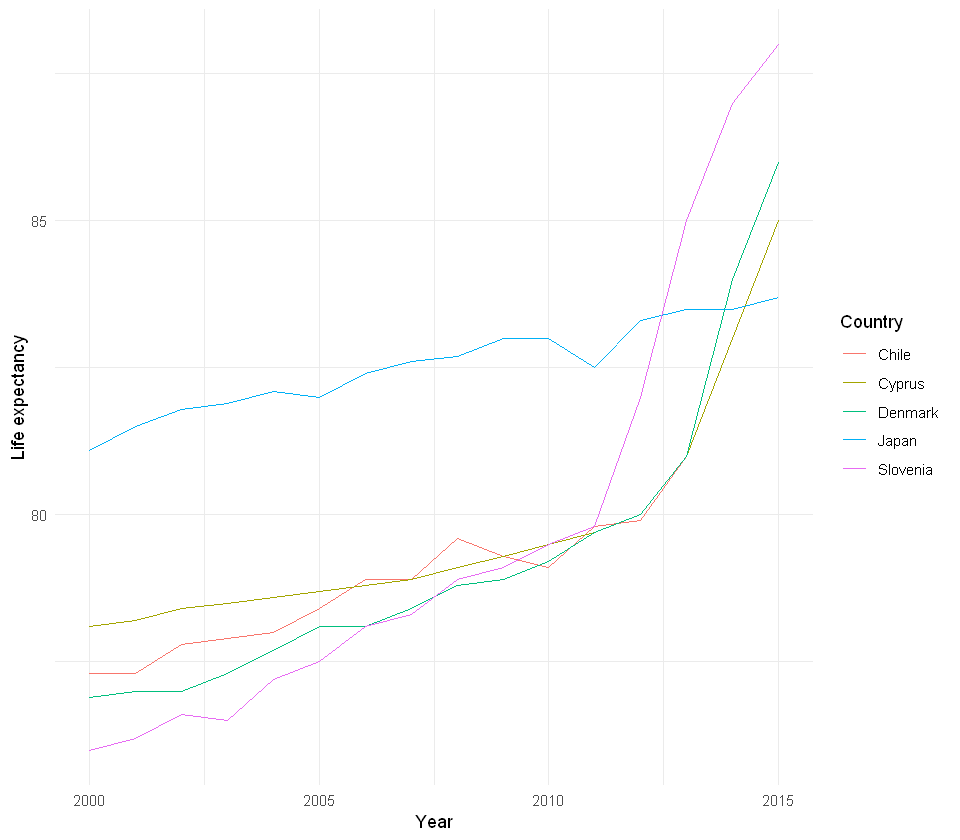

In [14]:
le %>%
    filter(Country %in% c("Slovenia", "Denmark", "Chile", "Cyprus", "Japan")) %>%
    ggplot(aes(x=Year, y=`Life expectancy`, color=Country)) +
    geom_line() +
    theme_minimal()

Between the countries with the highest life expectancy in 2015, Japan has the most consistent growth. Meanwhile, the other countries  has an expressive increase between 2010 and 2015. Japan in also the only country to the in the highest life expectancy both in 2000 and 2015.

In [15]:
## increase between developed countries
le %>%
    filter(Status=="Developed",
           Year %in% c(2000, 2015)) %>%
    select(Country, Year, `Life expectancy`) %>%
    pivot_wider(names_from = Year, values_from = `Life expectancy`) %>%
    mutate(Increase = `2015`-`2000`) %>%
    arrange(desc(Increase))

Country,2015,2000,Increase
<chr>,<dbl>,<dbl>,<dbl>
Slovenia,88.0,76.0,12.0
Denmark,86.0,76.9,9.1
Cyprus,85.0,78.1,6.9
Ireland,81.4,76.4,5.0
Singapore,83.1,78.3,4.8
Portugal,81.1,76.6,4.5
Luxembourg,82.0,77.8,4.2
Malta,81.7,77.5,4.2
Czechia,78.8,74.7,4.1


Between the developed countries, Slovenia had the biggest increase in life expectancy and only Romania had a decrease. The graph below shows the data in the period for the latter.

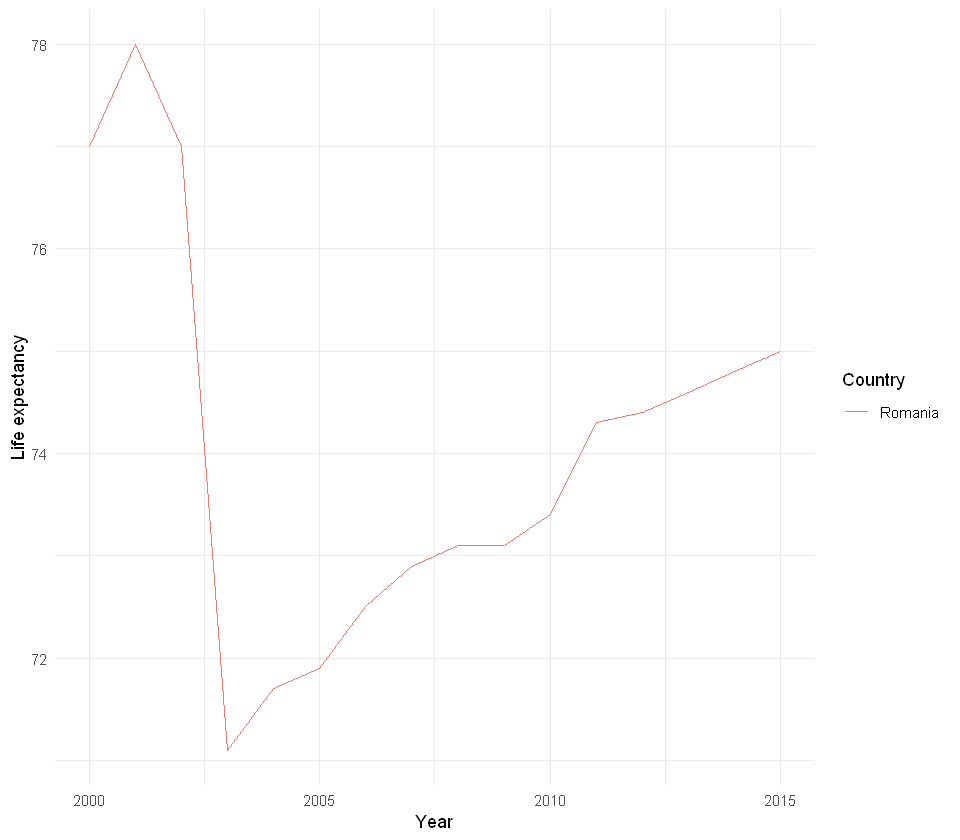

In [16]:
le %>%
    filter(Country=="Romania") %>%
    ggplot(aes(x=Year, y=`Life expectancy`, color=Country)) +
    geom_line() +
    theme_minimal()

In the graph above we can see an abrupt decrease in life expectancy between 2002 and 2013. After that, the life expectancy was increasing.

#### Modeling

The code below creates one linear regression model for the years: 2000, 2005, 2010 and 2015. In each model, we want to analyse the influence of each factor in the final response.

In [31]:
## 2000's model
lm_2000 = lm(`Life expectancy` ~ ., data = le %>% filter(Year == 2000) %>% select(-c("Country", "Year")))
summary(lm_2000)


Call:
lm(formula = `Life expectancy` ~ ., data = le %>% filter(Year == 
    2000) %>% select(-c("Country", "Year")))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7066 -1.1974 -0.1412  1.2623  5.6089 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        6.225e+01  3.584e+00  17.370  < 2e-16 ***
StatusDeveloping                   7.455e-01  1.233e+00   0.604  0.54887    
`Adult Mortality`                 -2.630e-02  5.108e-03  -5.149 6.94e-06 ***
`infant deaths`                    4.635e-01  2.374e-01   1.953  0.05771 .  
Alcohol                            1.668e-01  1.669e-01   1.000  0.32326    
`percentage expenditure`          -4.060e-04  1.497e-03  -0.271  0.78756    
`Hepatitis B`                      3.162e-02  1.459e-02   2.167  0.03609 *  
Measles                            5.265e-05  9.759e-05   0.540  0.59244    
BMI                                2.017e-02  2.652e-02   0.761  0.45128    
`un